# 茨城県の人口推移と土地価格の推移



・人口総数のマップをプロット（22年分）
・土地価格（地価価格）マップをプロット（22年分）

それぞれのマップをアニメーション化、22年間でどのような変化があるか可視化する。

また、人口総数と地価価格の相関はあるかどうか見る。



In [1]:
import geopandas as gpd
import pandas as pd

In [3]:
# データを変数に入れる
ibaraki = gpd.read_file('ibaraki.geojson')

<Axes: >

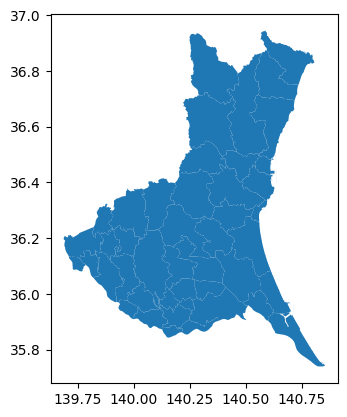

In [5]:
ibaraki.plot()

In [6]:
ibaraki

,N03_001,N03_002,N03_003,N03_004,N03_005,N03_007,geometry
0,茨城県,None,None,水戸市,None,08201,"POLYGON ((140.50173 36.30390, 140.50216 36.303..."
1,茨城県,None,None,日立市,None,08202,"POLYGON ((140.62736 36.48348, 140.62697 36.483..."
2,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63352 36.48167, 140.63349 36.481..."
3,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63684 36.48263, 140.63683 36.479..."
4,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63091 36.49787, 140.63081 36.498..."
...,...,...,...,...,...,...,...
215,茨城県,None,猿島郡,五霞町,None,08542,"POLYGON ((139.77252 36.08333, 139.77252 36.083..."
216,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.81903 36.05802, 139.82017 36.057..."
217,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.84043 36.08864, 139.84028 36.088..."
218,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.84335 36.09704, 139.84319 36.097..."


In [9]:
# rename
ibaraki.rename(columns={'N03_007':'KEY_CODE'},inplace=True)

In [10]:
print(ibaraki['KEY_CODE'])

0      08201
1      08202
2      08202
3      08202
4      08202
       ...  
215    08542
216    08546
217    08546
218    08546
219    08564
Name: KEY_CODE, Length: 220, dtype: object


In [11]:
print(ibaraki['KEY_CODE'].to_list())

['08201', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08203', '08204', '08205', '08207', '08208', '08208', '08210', '08210', '08211', '08212', '08214', '08214', '08214', '08214', '08214', '08214', '08214', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08216', '08217', '08219', '08220', '08221', '08221', '08221', '08221', '08222', '08222', '08222', '08223', '08224', '08225', '08226', '08227', '08228', '08228', '08228', '08229', '08230', '08231', '08232', '08232', '08232', '08232', '08232', '08233', '08234', '08235', '08236', '08302', '08309', '08309', '08309', '08309', 

In [13]:
unique_ibaraki = ibaraki[['KEY_CODE', 'N03_004']].drop_duplicates()

In [14]:
print(unique_ibaraki)

    KEY_CODE  N03_004
0      08201      水戸市
1      08202      日立市
33     08203      土浦市
34     08204      古河市
35     08205      石岡市
36     08207      結城市
37     08208     龍ケ崎市
39     08210      下妻市
41     08211      常総市
42     08212    常陸太田市
43     08214      高萩市
50     08215     北茨城市
75     08216      笠間市
76     08217      取手市
77     08219      牛久市
78     08220     つくば市
79     08221   ひたちなか市
83     08222      鹿嶋市
86     08223      潮来市
87     08224      守谷市
88     08225    常陸大宮市
89     08226      那珂市
90     08227      筑西市
91     08228      坂東市
94     08229      稲敷市
95     08230  かすみがうら市
96     08231      桜川市
97     08232      神栖市
102    08233      行方市
103    08234      鉾田市
104    08235  つくばみらい市
105    08236     小美玉市
106    08302      茨城町
107    08309      大洗町
206    08310      城里町
207    08341      東海村
210    08364      大子町
211    08442      美浦村
212    08443      阿見町
213    08447      河内町
214    08521     八千代町
215    08542      五霞町
216    08546       境町
219    08564      利根町


In [16]:
file_path = 'C:\Users\sui7z\OneDrive\python/unique_ibaraki.csv'
unique_ibaraki.to_csv(file_path, index=False)

file_path

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3835420295.py, line 1)

In [26]:

# CSVファイルとして保存 (UTF-8エンコーディング)
file_path = r'C:\Users\sui7z\OneDrive\python\unique_ibaraki.csv'
unique_ibaraki.to_csv(file_path, index=False, encoding='utf-8')

In [27]:
# CSVファイルとして保存 (Shift_JISエンコーディング)
file_path = r'C:\Users\sui7z\OneDrive\python\unique_ibaraki.csv'
unique_ibaraki.to_csv(file_path, index=False, encoding='shift_jis')